# 다양한 LLM 모델 활용

In [ ]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

In [ ]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install langchain-teddynote
from langchain_teddynote import logging
from langchain_teddynote.messages import stream_response

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH04-Models")

## OpenAI

### 개요
OpenAI는 채팅 전용 Large Language Model (LLM)을 제공합니다. 이 모델을 생성할 때 다양한 옵션을 지정할 수 있으며, 이러한 옵션들은 모델의 동작 방식에 영향을 미칩니다.

### 옵션 상세 설명

`temperature`

- 샘플링 온도를 설정하는 옵션입니다. 값은 0과 2 사이에서 선택할 수 있습니다. 높은 값(예: 0.8)은 출력을 더 무작위하게 만들고, 낮은 값(예: 0.2)은 출력을 더 집중되고 결정론적으로 만듭니다.

`max_tokens`

- 채팅 완성에서 생성할 토큰의 최대 개수를 지정합니다. 이 옵션은 모델이 한 번에 생성할 수 있는 텍스트의 길이를 제어합니다.

`model_name`

- 적용 가능한 모델을 선택하는 옵션입니다. 더 자세한 정보는 [OpenAI 모델 문서](https://platform.openai.com/docs/models)에서 확인할 수 있습니다.


**모델 스펙**

- 링크: https://platform.openai.com/docs/models/gpt-4o

| 모델명 | 설명 | 컨텍스트 길이 | 최대 출력 토큰 | 학습 데이터 |
|--------|------|---------------|-----------------|-------------|
| gpt-4o | GPT-4 터보보다 저렴하고 빠른 최신 다중모드 플래그십 모델 | 128,000 토큰 | 4,096 토큰 | 2023년 10월까지 |
| gpt-4-turbo | 최신 GPT-4 터보 모델. 비전 기능, JSON 모드, 기능 호출 지원 | 128,000 토큰 | 4,096 토큰 | 2023년 12월까지 |
| gpt-4o-mini | GPT-3.5 터보보다 더 우수한 성능의 작은 모델 | 128,000 토큰 | 16,384 토큰 | 2023년 10월까지 |
| o1-preview | 다양한 도메인의 어려운 문제 해결을 위한 추론 모델 | 128,000 토큰 | 32,768 토큰 | 2023년 10월까지 |
| o1-mini | 코딩, 수학, 과학에 특화된 빠른 추론 모델 | 128,000 토큰 | 65,536 토큰 | 2023년 10월까지 |
| gpt-4o-realtime | 실시간 API용 오디오 및 텍스트 입력 처리 모델 (베타) | 128,000 토큰 | 4,096 토큰 | 2023년 10월까지 |


In [ ]:
from langchain_openai import ChatOpenAI

# ChatOpenAI 객체를 생성합니다.
gpt = ChatOpenAI(
    temperature=0,
    model_name="gpt-4o",  # 모델명
)

# 스트리밍 출력을 위하여 invoke() 대신 stream()을 사용합니다.
answer = gpt.stream("사랑이 뭔가요?")

# 답변 출력
stream_response(answer)

# Anthropic

Anthropic은 인공지능(AI) 안전성과 연구에 중점을 둔 미국의 스타트업 기업입니다. 주요 정보는 다음과 같습니다:

- **설립 연도**: 2021년
- **위치**: 미국 샌프란시스코
- **창립자**: OpenAI 출신 직원들 (Daniela Amodei와 Dario Amodei 등)
- **기업 형태**: 공익기업(Public Benefit Corporation)으로 등록

## Claude

Claude는 Anthropic의 대표적인 대규모 언어 모델(LLM) 제품군입니다. 

- **API 키 발급**: [https://console.anthropic.com/settings/keys](https://console.anthropic.com/settings/keys)
- **모델 리스트**: [https://docs.anthropic.com/en/docs/about-claude/models](https://docs.anthropic.com/en/docs/about-claude/models)


![](images/anthropic-20241023.png)

| model_name        | model                              | Anthropic API                                | AWS Bedrock                                   | GCP Vertex AI                      |
|------------------|------------------------------------|--------------------------------------------|----------------------------------------------|-----------------------------------|
| Claude 3.5 Opus  | 연말 출시 예정                         | 연말 출시 예정                                | 연말 출시 예정                                   | 연말 출시 예정                        |
| Claude 3.5 Sonnet| claude-3-5-sonnet-20241022         | claude-3-5-sonnet-20241022                 | anthropic.claude-3-5-sonnet-20241022-v2:0     | claude-3-5-sonnet-v2@20241022      |
| Claude 3.5 Haiku | 연말 출시 예정                         | 연말 출시 예정                                | 연말 출시 예정                                   | 연말 출시 예정                        |
| Claude 3 Opus    | claude-3-opus-20240229             | claude-3-opus-20240229                     | anthropic.claude-3-opus-20240229-v1:0         | claude-3-opus@20240229             |
| Claude 3 Sonnet  | claude-3-sonnet-20240229           | claude-3-sonnet-20240229                   | anthropic.claude-3-sonnet-20240229-v1:0       | claude-3-sonnet@20240229           |
| Claude 3 Haiku   | claude-3-haiku-20240307            | claude-3-haiku-20240307                    | anthropic.claude-3-haiku-20240307-v1:0        | claude-3-haiku@20240307            |

In [ ]:
from langchain_anthropic import ChatAnthropic

# ChatAnthropic 객체를 생성합니다.
anthropic = ChatAnthropic(model_name="claude-3-5-sonnet-20241022")

# 스트리밍 출력을 위하여 invoke() 대신 stream()을 사용합니다.
answer = anthropic.stream("사랑이 뭔가요?")

# 답변 출력
stream_response(answer)

# Perplexity

링크: https://www.perplexity.ai/

- **설립연도**: 2022년
- **주요 투자자**: Jeff Bezos, Nvidia, Databricks, Bessemer Venture Partners, IVP, Wayra 등
- **최근 펀딩**: 5억 달러 (2024년 10월)
- **기업 가치**: 약 90억 달러 (2024년 11월 기준)
- **월간 활성 사용자**: 1,500만 명

## Perplexity Pro 정확한 특징

- **일일 Pro 검색**: 300회
- **AI 모델 선택**: GPT-4 Omni, Claude 3 Sonnet/Haiku, Sonar Large 32k[5]
- **파일 분석**: PDF, CSV, 이미지 파일 지원
- **가격**: 월 $20 또는 연 $200

## Perplexity API 사용 방법

**가격**

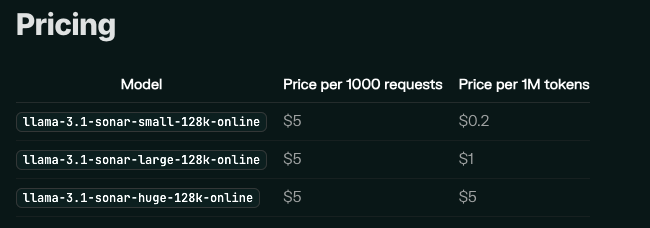

- **API 크레딧 획득**
   - Perplexity Pro 구독 시 **매월 $5 상당의 API 크레딧 제공**

- **API 모델 옵션**
   - Llama 3 기반 모델
   - Perplexity 온라인 LLM
   - 인용 기능 포함

- API 키 발급: [API 콘솔](https://www.perplexity.ai/settings/api)

API 키 발급 후 `.env` 파일에 키 저장

```
PPLX_API_KEY=이곳에 API 키를 입력하세요.
```

혹은

```
import os

os.environ["PPLX_API_KEY"] = "이곳에 API 키를 입력하세요."
```

**참고**

- [API 문서](https://docs.perplexity.ai/api-reference/chat-completions)

## 지원 모델

| Model                                 | Parameter Count | Context Length | Model Type        |
|---------------------------------------|-----------------|----------------|-------------------|
| `llama-3.1-sonar-small-128k-online`   | 8B              | 127,072        | Chat Completion   |
| `llama-3.1-sonar-large-128k-online`   | 70B             | 127,072        | Chat Completion   |
| `llama-3.1-sonar-huge-128k-online`    | 405B            | 127,072        | Chat Completion   |


## ChatPerplexity 매개변수

`model`  
사용할 언어 모델을 지정 (예: "llama-3.1-sonar-small-128k-online") - 기본 성능과 능력을 결정.

`temperature`  
응답의 무작위성을 조절 (0.0-1.0), 0은 결정적, 1은 가장 무작위한 응답 생성.

`top_p`  
토큰 샘플링의 확률 임계값 설정 (0.0-1.0), 높을수록 더 다양한 출력 허용.

`search_domain_filter`  
검색 결과를 지정된 도메인으로 제한, 리스트 형태로 제공 (예: ["perplexity.ai"]).

`return_images`  
응답에 이미지 포함 여부를 결정하는 불리언 플래그.

`return_related_questions`  
관련 질문 제안 기능을 활성화/비활성화하는 불리언 플래그.

`top_k`  
사용할 검색 결과의 수 제한 (0은 제한 없음을 의미).

`streaming`  
응답을 스트리밍으로 받을지 완성된 형태로 받을지 결정하는 불리언 플래그.

`presence_penalty`  
토큰 반복에 대한 페널티 (-2.0에서 2.0), 높을수록 재사용을 억제.

`frequency_penalty`  
일반적/희귀 토큰 선호도 조정 (-2.0에서 2.0), 높을수록 희귀 토큰 선호.

In [1]:
from langchain_teddynote.models import ChatPerplexity

perplexity = ChatPerplexity(
    model="llama-3.1-sonar-large-128k-online",
    temperature=0.2,
    top_p=0.9,
    search_domain_filter=["perplexity.ai"],
    return_images=False,
    return_related_questions=True,
    # search_recency_filter="month",
    top_k=0,
    streaming=False,
    presence_penalty=0,
    frequency_penalty=1,
)

응답을 출력합니다. `ChatPerplexity` 는 지식 정보의 출처를 `citations` 속성에 저장합니다.

In [ ]:
# 응답 출력
response = perplexity.invoke("2024년 노벨문학상 수상자를 조사해 주세요")
print(response.content)

print()
for i, citation in enumerate(response.citations):
    print(f"[{i+1}] {citation}")

스트리밍 출력

In [ ]:
response = perplexity.stream("2024년 노벨문학상 수상자를 조사해 주세요")

for token in response:
    print(token.content, end="", flush=True)

print("\n")
for i, citation in enumerate(token.citations):
    print(f"[{i+1}] {citation}")

## Together AI

- 링크: https://www.together.ai/
- API 키 발급: https://api.together.ai/
- `TOGETHER_API_KEY` 환경변수 설정
  
Together AI는 2022년 샌프란시스코에서 설립된 생성형 AI 클라우드 플랫폼 회사입니다(NVIDIA, Kleiner Perkins, Lux, NEA 등으로부터 1억 2천만 달러 이상의 투자를 유치했습니다).

### 주요 제품과 특징

**Together Inference**

- 업계에서 가장 빠른 추론 스택을 제공하며, vLLM보다 최대 4배 빠른 성능을 보입니다
- Llama-3 70B 사용 시 GPT-4 대비 11배 낮은 비용으로 운영 가능
- 자동 확장 기능으로 API 요청 볼륨에 맞춰 용량이 자동으로 조정됩니다

**Together Custom Models**

- 사용자 맞춤형 AI 모델 학습 및 Fine-tuning 지원
- FlashAttention-3와 같은 최신 최적화 기술 적용
- 학습된 모델에 대한 완전한 소유권 보장

### 기술적 특징

**성능 최적화**

- FlashAttention-3 커널과 독점 커널을 통합한 추론 엔진 보유
- Medusa와 SpecExec 같은 추측적 디코딩 알고리즘 적용
- 최고의 정확도와 성능을 위한 독자적인 양자화 기술 사용

**지원 모델**

- Google Gemma, Meta의 Llama 3.3, Qwen2.5, Mistral AI의 Mistral/Mixtral 등 200개 이상의 오픈소스 모델 지원
- 멀티모달 AI 모델 지원으로 다양한 형태의 데이터 처리 가능

**보안 및 프라이버시**

- 사용자가 명시적으로 동의하지 않는 한 데이터는 새로운 모델 학습에 사용되지 않음
- 데이터 보관에 대한 완전한 제어권을 사용자에게 제공

In [ ]:
from langchain_teddynote.messages import stream_response
from langchain_together import ChatTogether

together = ChatTogether(model="meta-llama/Llama-3.3-70B-Instruct-Turbo", temperature=0)
# together = ChatTogether(model="google/gemma-2-27b-it", temperature=0)

answer = together.stream("로또 생성기 파이썬 코드를 작성하세요")
stream_response(answer)

function calling 지원

In [ ]:
from pydantic import BaseModel
from typing import List


class Lotto(BaseModel):
    numbers: List[int]


together_structured = together.with_structured_output(Lotto)

answer = together_structured.invoke("로또 번호 6개를 추천해 주세요")
print(answer)

# Cohere

Cohere는 기업용 인공지능 솔루션을 제공하는 선도적인 AI 기업으로, 대규모 언어 모델(LLM)을 개발하여 기업들이 AI 기술을 쉽게 도입하고 활용할 수 있도록 돕고 있습니다.

## Cohere 개요

- **설립연도**: 2020년
- **주요 투자자**: Inovia Capital, NVIDIA, Oracle, Salesforce Ventures
- **시리즈 C 펀딩**: 2억 7000만 달러 유치
- **기업 미션**: 기업용 AI 플랫폼 제공

## 주요 제품

### Command R+

Command R+는 기업용으로 최적화된 Cohere의 최신 LLM입니다. 

#### 주요 특징

- **긴 컨텍스트 윈도우**: 128k 토큰 지원
- **고급 RAG 기능**: 검색 강화 생성 기능 제공
- **다국어 지원**: 10개 주요 비즈니스 언어 지원
- **자동화 도구 사용 기능**: 복잡한 비즈니스 프로세스 자동화

### Aya

Aya는 Cohere의 비영리 연구소인 Cohere for AI에서 개발한 오픈소스 다국어 LLM입니다. 

#### 주요 특징

- **언어 지원**: 101개 언어 지원 (기존 오픈소스 모델의 두 배 이상)
- **훈련 데이터셋**: 5억 1300만 개의 데이터 포인트 포함하는 대규모 다국어 훈련 데이터셋 공개


In [ ]:
from langchain_cohere import ChatCohere

# ChatCohere 객체를 생성합니다.
cohere = ChatCohere(temperature=0)

# 스트리밍 출력을 위하여 invoke() 대신 stream()을 사용합니다.
answer = cohere.stream("사랑이 뭔가요?")

# 답변 출력
stream_response(answer)

# Upstage

Upstage는 인공지능(AI) 기술, 특히 대규모 언어 모델(LLM)과 문서 AI 분야에 특화된 국내 스타트업입니다.

## 주요 제품 및 기술

### Solar LLM
- **주요 특징**: Upstage의 주력 대규모 언어 모델로, 빠른 성능과 비용 효율성으로 주목받고 있습니다.
- **기술적 접근**: Depth-Up Scaling (DUS) 기술을 적용하여 성능을 극대화합니다.
- **플랫폼 통합**: Amazon SageMaker JumpStart 등 다양한 플랫폼을 통해 API로 통합 제공됩니다.

### Document AI Pack
- **기능**: OCR 기술을 기반으로 한 문서 처리 솔루션으로, 복잡한 문서에서 필요한 내용을 정확히 추출하고 디지털화합니다.

### AskUp Seargest
- **특징**: 개인화된 검색 및 추천 서비스를 제공하며, 기존의 ChatGPT 통합 무료 챗봇 AskUp의 업그레이드 버전입니다.

## API 키 발급
API 키 발급은 [여기](https://console.upstage.ai/api-keys)에서 가능합니다.


In [9]:
# UPSTAGE API KEY 설정
# import os

# os.environ["UPSTAGE_API_KEY"] = "이곳에 API KEY를 입력하세요."

In [ ]:
from langchain_upstage import ChatUpstage

# ChatUpstage 객체를 생성합니다.
upstage = ChatUpstage(model="solar-pro")

# 스트리밍 출력을 위하여 invoke() 대신 stream()을 사용합니다.
answer = upstage.stream("사랑이 뭔가요?")

# 답변 출력
stream_response(answer)

## Xionic

사이오닉에이아이(Sionic AI)는 대한민국의 유망한 인공지능 스타트업으로, 기업용 생성형 AI 솔루션을 개발하고 있습니다. 다음은 이 회사에 대한 주요 정보입니다:

### 주요 제품

1. **STORM Platform**: 기업이 생성형 AI를 기술적 고민 없이 바로 적용할 수 있도록 하는 플랫폼
2. **STORM Answer**: 기업에 최적화된 생성형 AI 솔루션으로 비즈니스 생산성 향상을 목표로 함
3. **Xionic**: 상업적 이용이 가능한 라이센스의 한국어 AI 모델

상업적 이용이 가능한 라이센스의 한국어 모델

- 링크: https://github.com/sionic-ai/xionic

(참고) 2024.11.29 기준 사용불가 (API 서버 오류)

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import stream_response

# 2024. 11. 21 업데이트 코드
xionic = ChatOpenAI(
    model_name="xionic-1-72b-20240919",
    base_url="https://sionic.chat/v1/",
    api_key="934c4bbc-c384-4bea-af82-1450d7f8128d",
)

# 스트리밍 출력을 위하여 invoke() 대신 stream()을 사용합니다.
answer = xionic.stream("사랑이 뭔가요?")

# 답변 출력
stream_response(answer)

# LogicKor

LogicKor는 한국어 언어 모델의 다분야 사고력을 평가하기 위해 만들어진 벤치마크 리더보드입니다.

## 목적

한국어 언어 모델의 다양한 분야에서의 사고력을 측정하는 벤치마크

## 평가 영역

- 한국어 추론
- 수학
- 글쓰기
- 코딩
- 이해력

## 주요 특징

1. **다양한 모델 평가**: 국내외 다양한 언어 모델들의 성능을 비교할 수 있음
2. **객관적 성능 측정**: 모델의 실제 성능을 다각도로 평가하여 객관적인 지표 제공
3. **오픈 소스**: 누구나 접근하고 결과를 확인할 수 있는 오픈 플랫폼

LogicKor 리더보드는 한국어 AI 모델의 발전을 위한 중요한 도구로 자리잡고 있으며, 지속적인 개선과 발전이 기대되고 있습니다.

- 링크: [LogicKor 리더보드](https://lk.instruct.kr/)
